In [2]:
import pandas as pd 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt 
import datetime as dt 
import yfinance as yf



In [3]:
yf.pdr_override()

ticker = 'SU'
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

df=pdr.get_data_yahoo(ticker,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
print(df)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  17.000000  17.219999  16.549999  16.719999  14.696445   8922400
2021-01-05  16.840000  18.440001  16.840000  18.219999  16.014906  12776500
2021-01-06  18.580000  18.930000  18.240000  18.530001  16.287390   8579800
2021-01-07  18.850000  18.950001  18.580000  18.760000  16.489552   6644400
2021-01-08  19.010000  19.010000  18.250000  18.480000  16.243441   5869800
...               ...        ...        ...        ...        ...       ...
2024-05-23  40.910000  41.500000  39.919998  40.119999  40.119999   5019300
2024-05-24  40.450001  40.700001  40.099998  40.299999  40.299999   5251400
2024-05-28  40.700001  41.139999  40.400002  40.650002  40.650002   6869800
2024-05-29  40.330002  40.529999  39.349998  39.709999  39.709999   3331700
2024-05-30  39.750000  40.455002  39.730000  40.375000  40.375000    806460

[857 rows x

In [5]:
delta = df['Adj Close'].diff(1)
delta.dropna(inplace=True)
print(delta)

Date
2021-01-05    1.318461
2021-01-06    0.272484
2021-01-07    0.202162
2021-01-08   -0.246111
2021-01-11   -0.140635
                ...   
2024-05-23   -0.370003
2024-05-24    0.180000
2024-05-28    0.350002
2024-05-29   -0.940002
2024-05-30    0.665001
Name: Adj Close, Length: 856, dtype: float64


In [6]:
positive = delta.copy()
negative = delta.copy()

In [7]:
positive[positive<0]=0
negative[negative>0]=0

In [8]:
days = 14


In [9]:
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain/average_loss
RSI = 100 - (100/(1+relative_strength))

In [10]:
combined = pd.DataFrame()
combined['Adj Close'] = df['Adj Close']
combined['RSI'] = RSI

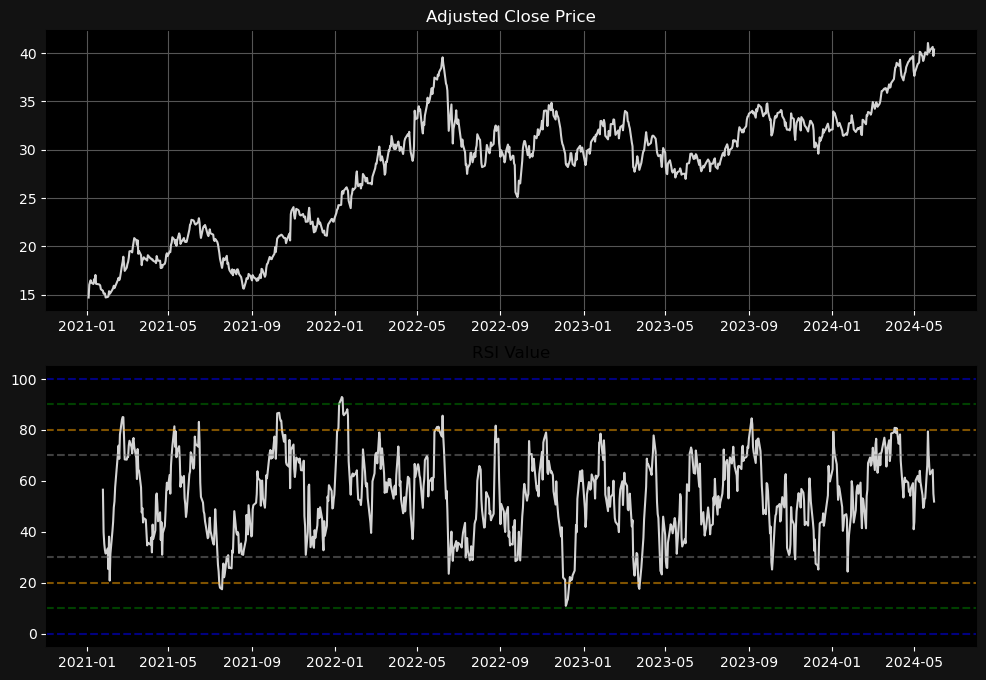

In [11]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title("Adjusted Close Price", color='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')

ax2.axhline(0, linestyle='--', alpha=0.5, color='blue')
ax2.axhline(10, linestyle='--', alpha=0.5, color='green')
ax2.axhline(20, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(30, linestyle='--', alpha=0.5, color='grey')
ax2.axhline(70, linestyle='--', alpha=0.5, color='grey')
ax2.axhline(80, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(90, linestyle='--', alpha=0.5, color='green')
ax2.axhline(100, linestyle='--', alpha=0.5, color='blue')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

plt.show()